In [1]:
from fastPLNmodels.utils import build_block_Sigma, C_from_Sigma, sample_PLN, MSE
import torch
from fastPLNmodels.models import IMPS_PLN, log_likelihood, fastPLN, fastPLNPCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

device  cuda


In [7]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else : 
    device = torch.device('cpu')
    
#device = torch.device('cpu') # think I can't use RTX A5000 right now, will check this later. 
torch.cuda.is_available()
# print('device ', device)

device  cuda


True

## Importation of the data

In [24]:
Y = pd.read_csv('Y_test')
O = pd.read_csv('O_test')
cov = pd.read_csv('cov_test')
true_Sigma = torch.from_numpy(pd.read_csv('true_Sigma_test').values)
true_beta = torch.from_numpy(pd.read_csv('true_beta_test').values)

##  Test fastPLN model

Initialization ...
nb iteration to find the mode:  159
Initialization finished
Last delta: 0.07915439867095131,  reached in 27 iterations
Last ELBO : 95.00927558790266


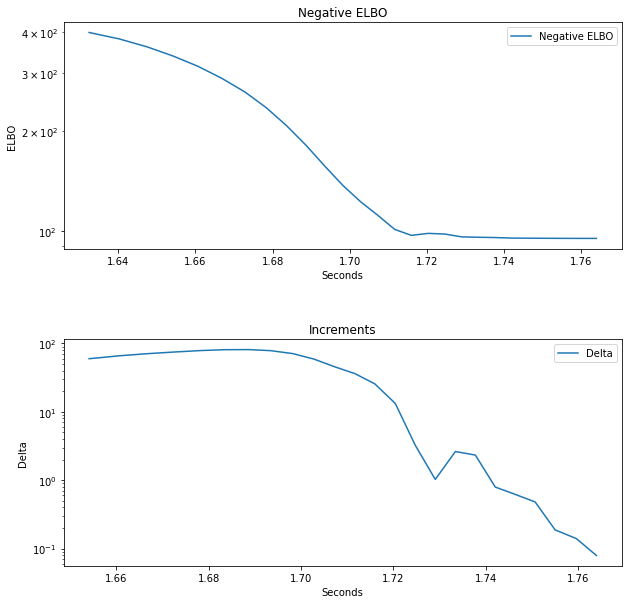

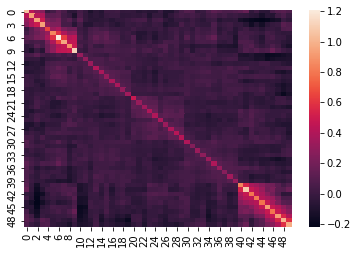

In [25]:
fast = fastPLN()
fast.fit(Y,O,cov)
print(fast)

In [26]:
print('beta : ', fast.get_beta())
print('Sigma:', fast.get_Sigma())
print('C : ', fast.get_C())

beta :  tensor([[ 0.5358, -0.0975, -0.9134,  0.2745, -0.4371,  0.7170, -0.0178,  0.1733,
          0.5752,  0.7066, -0.1528, -0.0477, -0.9654, -1.3959, -0.8913, -0.8926,
         -1.4938, -0.7716, -0.2080,  1.3278, -0.5220, -0.4053,  0.4341, -1.3219,
          0.8973, -0.0750, -0.9294, -0.6812,  0.6460,  0.0564, -0.0244, -1.1817,
         -0.0086,  0.0831,  0.1527, -1.3299,  1.1865, -0.2200,  2.3137, -0.1347,
          0.1511, -0.2525,  0.5391, -0.6822, -0.1414,  0.5199,  0.6613,  0.3113,
         -0.9514, -0.2755],
        [-0.4007,  0.6242, -0.0442,  0.4057, -0.8926, -0.8497,  0.0714,  0.1897,
         -0.7819, -0.6274, -0.5041, -0.7114,  0.4857, -0.3481, -0.3795,  0.2924,
         -0.1745, -0.0347, -0.0884, -0.0548, -0.7595, -1.2987,  0.3423, -0.2614,
         -0.3851, -0.8389, -0.2713,  0.2225, -0.1967,  0.2081,  0.3174, -0.2016,
         -0.5623,  0.5871, -0.7006,  0.0938,  0.1952, -0.5720, -0.0679, -0.5080,
          0.5669,  0.6238,  0.1765,  0.5265, -0.6252,  1.6189,  0.5117, -

## Test fastPLNPCA

In [ ]:
fastpca = fastPLNPCA(q = 5)
fastpca.fit(Y,O,cov)
print(fastpca)

device  cuda
Initialization ...
nb iteration to find the mode:  55
Initialization finished


In [11]:
print('beta : ', fastpca.get_beta())
print('Sigma:', fastpca.get_Sigma())
print('C : ', fastpca.get_C())

beta :  tensor([[ 0.4921, -0.1335, -0.8689,  0.2483, -0.5047,  0.7232,  0.0101,  0.2265,
          0.6203,  0.7416, -0.1841, -0.0317, -1.0193, -1.3959, -1.0111, -0.9393,
         -1.5690, -0.7923, -0.2056,  1.3680, -0.5229, -0.3695,  0.4910, -1.3300,
          0.9609, -0.0655, -0.9682, -0.6931,  0.7692,  0.0597, -0.0711, -1.1720,
         -0.0671,  0.0920,  0.1398, -1.3222,  1.2412, -0.2619,  2.2759, -0.1613,
          0.1319, -0.2621,  0.5682, -0.6791, -0.1430,  0.4859,  0.7328,  0.3364,
         -0.9697, -0.2220],
        [-0.4336,  0.6922, -0.0112,  0.3619, -0.9919, -0.8741,  0.1116,  0.1537,
         -0.7997, -0.7271, -0.5555, -0.7087,  0.5575, -0.2733, -0.3118,  0.2983,
         -0.1742, -0.0423, -0.1038, -0.0293, -0.7271, -1.3643,  0.3613, -0.3783,
         -0.4141, -0.8725, -0.3184,  0.2569, -0.2056,  0.2087,  0.3474, -0.1897,
         -0.6059,  0.6833, -0.7234,  0.0801,  0.2532, -0.6104, -0.0704, -0.5323,
          0.5621,  0.6965,  0.2243,  0.5655, -0.6589,  1.5920,  0.4957, -

## Test IMPS_PLN

Intialization ...
Initalization done


 24%|██▎       | 118/500 [00:49<02:41,  2.37it/s]

Algorithm stopped after  118  iterations
Max likelihood: -106.15663649278154


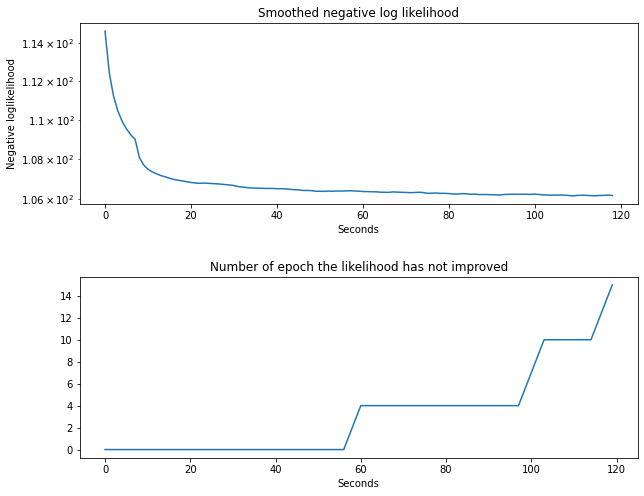

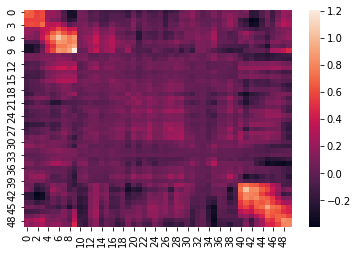

In [21]:
imps = IMPS_PLN(q = 5)
imps.fit(Y,O,cov, batch_size = 41, VR = None)
print(imps)

Intialization ...
Initalization done


 13%|█▎        | 66/500 [00:30<03:18,  2.18it/s]

Algorithm stopped after  66  iterations
Max likelihood: -105.8099352417783


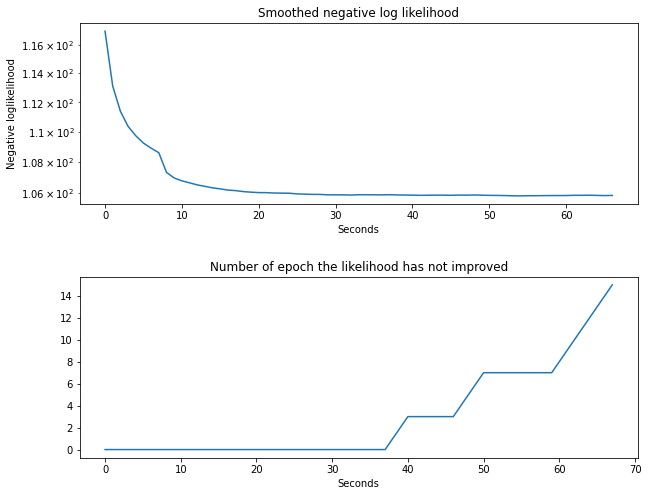

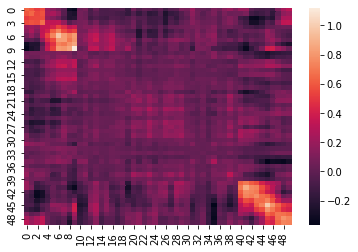

In [22]:
imps = IMPS_PLN(q = 5)
imps.fit(Y,O,cov, batch_size = 41)
print(imps)

In [15]:
print('beta : ', imps.get_beta())
print('Sigma:', imps.get_Sigma())
print('C : ', imps.get_C())

beta :  tensor([[ 0.5319, -0.1286, -0.9118,  0.2196, -0.5501,  0.7098, -0.0512,  0.1287,
          0.5618,  0.6380, -0.1822, -0.0517, -1.0352, -1.4089, -1.0043, -0.9508,
         -1.5333, -0.7870, -0.2195,  1.3637, -0.5500, -0.3784,  0.4841, -1.3099,
          0.9395, -0.0897, -0.9752, -0.6879,  0.7681,  0.0425, -0.0818, -1.1697,
         -0.0794,  0.0716,  0.1251, -1.3632,  1.2246, -0.2534,  2.3016, -0.1352,
          0.1280, -0.3523,  0.5177, -0.7209, -0.1243,  0.5502,  0.7485,  0.3261,
         -1.0124, -0.2889],
        [-0.3688,  0.6966, -0.0611,  0.3833, -1.0528, -0.9435, -0.0092,  0.0033,
         -0.8806, -0.8904, -0.5710, -0.7291,  0.4935, -0.3190, -0.3351,  0.2781,
         -0.2219, -0.0509, -0.1223, -0.0372, -0.7687, -1.3786,  0.3807, -0.3960,
         -0.4027, -0.8715, -0.3271,  0.2408, -0.2199,  0.2229,  0.3529, -0.1587,
         -0.6257,  0.6852, -0.7469,  0.1797,  0.2518, -0.5882, -0.0730, -0.5182,
          0.5133,  0.5887,  0.1786,  0.5281, -0.6902,  1.6824,  0.5284, -

## True value of Sigma 

<AxesSubplot:>

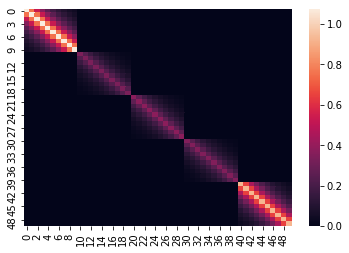

In [16]:
sns.heatmap(true_Sigma)

<AxesSubplot:>

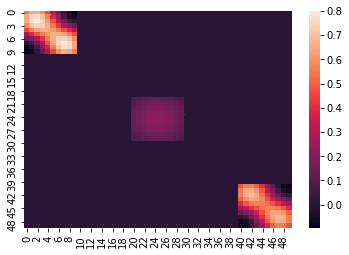

In [18]:
true_C = C_from_Sigma(true_Sigma, 5)
sns.heatmap(true_C@(true_C.T))